In [22]:
from workshop.dataset import CUBDataset
from workshop.model import BirdNet
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Resize
import matplotlib.pyplot as plt
import torch

from pathlib import Path

In [23]:
data_path = "/datasets/st/CUB_20"
batch_size = 32

dataset = CUBDataset(
        root_directory=data_path,
        set_="train",
        transforms=Compose([
            Resize(256),
            RandomCrop((224, 224), pad_if_needed=True),
            RandomHorizontalFlip(),
            ToTensor()
        ])
    )
data_loader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1)

model = BirdNet(20)

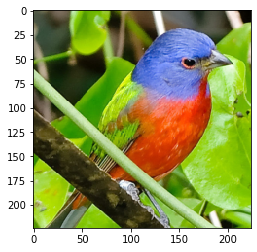

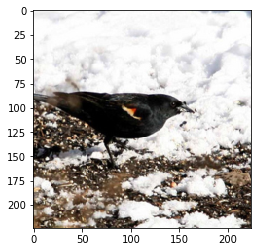

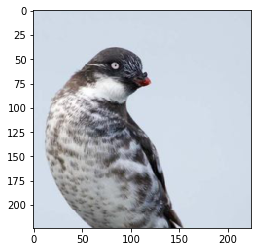

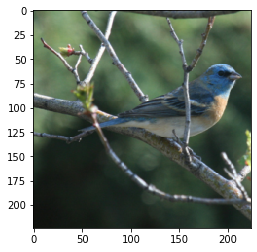

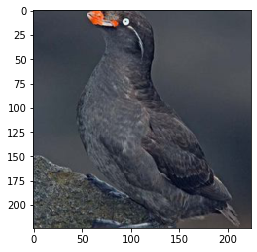

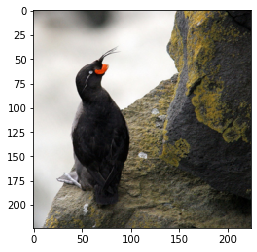

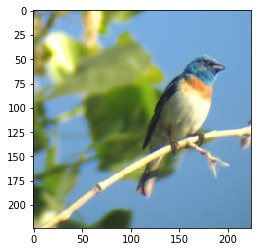

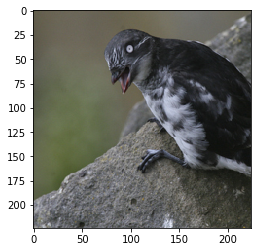

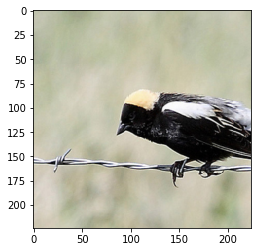

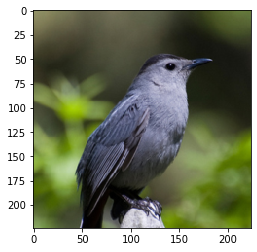

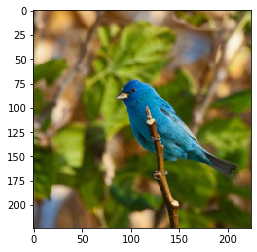

In [24]:
batch = next(iter(data_loader))
img_batch = batch[0]
for i, image in enumerate(img_batch):
    image = image.permute(1,2,0)
    plt.imshow(image)
    plt.show()
    if i == 10:
        break


In [25]:
project_dir = Path("..").resolve()
model_path = project_dir/"runs/bs32_lr0.001_wd0.0001_2W9Q02LK4C/final_model.pt"
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [26]:
for batch in data_loader:
    input_ = batch[0]
    target = batch[1]
    output_ = model(input_)
    
    